
# Auto Regressive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA
from datetime import datetime,timedelta
from time import time 

In [2]:
df = pd.read_csv('icecream.csv',parse_dates=['DATE'],index_col=0,squeeze=True)
df.rename('production',inplace=True)
df.head()

DATE
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636
Name: production, dtype: float64

In [3]:
df = df.asfreq(pd.infer_freq(df.index))
df.head()

DATE
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636
Freq: MS, Name: production, dtype: float64

In [4]:
df = df['2010-01-01':]
df.head()

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
Freq: MS, Name: production, dtype: float64

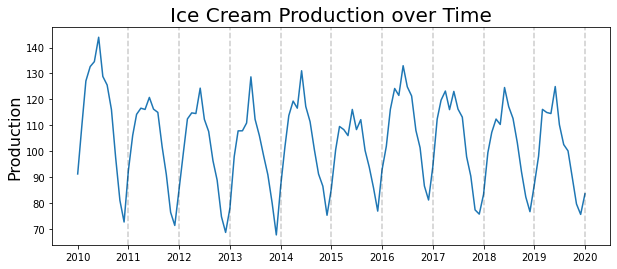

In [5]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Ice Cream Production over Time',fontsize=20)
plt.ylabel('Production',fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)),color='k',linestyle='--',alpha=0.2)

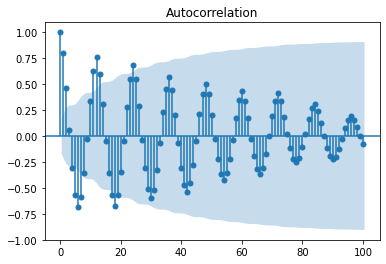

In [6]:
acf_plot = plot_acf(df,lags=100)

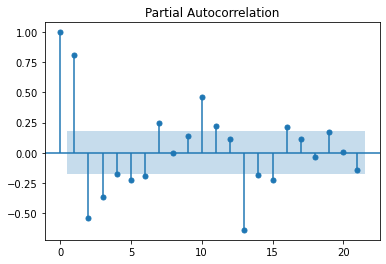

In [7]:
pacf_plot = plot_pacf(df)

In [8]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [9]:
import warnings
#create a model
model = ARMA(train_data,order=(3,0))

C:\Users\dasssvis\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:',end - start)

Model Fitting Time: 0.15922093391418457


In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:                     ARMA(3, 0)   Log Likelihood                -374.085
Method:                       css-mle   S.D. of innovations              7.642
Date:                Thu, 19 Nov 2020   AIC                            758.170
Time:                        17:19:39   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.5743      1.809     57.265      0.000     100.029     107.119
ar.L1.production     1.0469      0.088     11.960      0.000       0.875       1.218
ar.L2.production    -0.0523      0.134     -0.391      0.695      -0.314       0.210
ar.L3.production    -0.4044      0.089     -4.542      0.000      -0.579      -0.230
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9446           -0.5767j            1.1068           -0.0872
AR.2            0.9446           +0.5767j            1.1068            0.0872
AR.3           -2.0186           -0.0000j            2.0186           -0.5000
-----------------------------------------------------------------------------
"""

In [12]:
pred_start_date = test_data.index[0]
pred_start_date

Timestamp('2019-01-01 00:00:00', freq='MS')

In [13]:
pred_end_date = test_data.index[-1]
pred_end_date

Timestamp('2019-12-01 00:00:00', freq='MS')

In [14]:
predictions = model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data - predictions

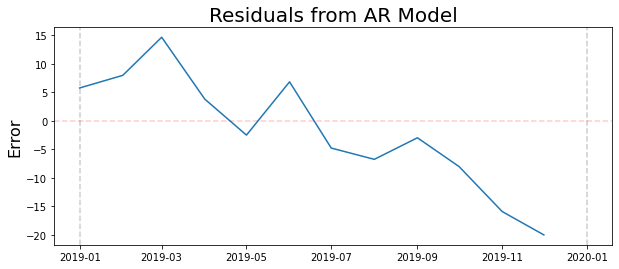

In [15]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)),color='k',linestyle='--',alpha=0.2)

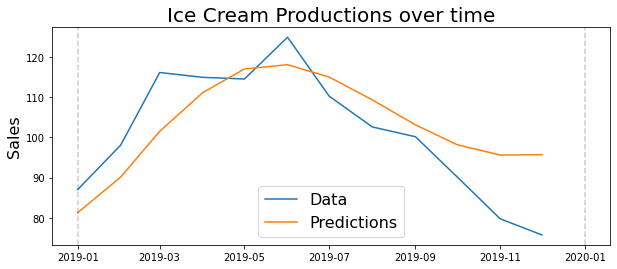

In [16]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Ice Cream Productions over time', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)),color='k',linestyle='--',alpha=0.2)

In [17]:
print('Mean Absolute percentage error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute percentage error: 0.0895


In [18]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 9.88405943870512
